<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Sample 데이터를 만들어 Random Forest에 대해 이해합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

# 1.데이터 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 데이터 만들기
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=10000,
                           n_features=12, 
                           n_classes=3,
                           n_informative=12,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=3)

In [3]:
# y 값 확인
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3336, 1: 3337, 2: 3327}


In [4]:
# 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 2.모델링

In [5]:
# xgboost 설치
# pip install xgboost

In [14]:
# 1단계: 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import *

In [17]:
# 2단계: 선언하기
model = XGBClassifier(eval_metric='mlogloss')

In [18]:
# 3단계: 학습하기
model.fit(x_train, y_train)

# eval_metrics
# rmse – root mean square error
# mae – mean absolute error
# logloss – negative log-likelihood
# error – Binary classification error rate (0.5 threshold)
# merror – Multiclass classification error rate
# mlogloss – Multiclass logloss
# auc: Area under the curve

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [19]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [20]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[976  17  16]
 [  8 992  19]
 [ 21  14 937]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1009
           1       0.97      0.97      0.97      1019
           2       0.96      0.96      0.96       972

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [21]:
# 변수 중요도 확인
model.feature_importances_

array([0.06073856, 0.035944  , 0.06584124, 0.10560562, 0.14140497,
       0.09936617, 0.07325762, 0.03241667, 0.09671476, 0.08674704,
       0.08779317, 0.11417012], dtype=float32)

# 3.다양한 옵션들

- 설정 가능한 하이퍼파라미터가 정말 많습니다.

In [22]:
# 다양한 옵션 확인
model.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

## 3.1.early_stopping_rounds

In [23]:
# 데이터 만들기
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=20000,
                           n_features=12, 
                           n_classes=3,
                           n_informative=12,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=3)

In [24]:
# 학습용, 평가용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 학습용, 검증용 데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2022)

# 선언하기
model = XGBClassifier(max_depth=5, 
                      learning_rate=1, 
                      use_label_encoder=False,
                      random_state=2022)

# 학습하기
model.fit(x_train, y_train, 
          eval_set=[(x_train, y_train),(x_val, y_val)], 
          eval_metric='mlogloss', 
          early_stopping_rounds=10)

[0]	validation_0-mlogloss:0.50643	validation_1-mlogloss:0.52558
[1]	validation_0-mlogloss:0.32767	validation_1-mlogloss:0.35660
[2]	validation_0-mlogloss:0.24541	validation_1-mlogloss:0.28123
[3]	validation_0-mlogloss:0.19404	validation_1-mlogloss:0.23259
[4]	validation_0-mlogloss:0.16194	validation_1-mlogloss:0.20335
[5]	validation_0-mlogloss:0.13662	validation_1-mlogloss:0.18397
[6]	validation_0-mlogloss:0.12184	validation_1-mlogloss:0.17290
[7]	validation_0-mlogloss:0.11024	validation_1-mlogloss:0.16288
[8]	validation_0-mlogloss:0.10268	validation_1-mlogloss:0.15992
[9]	validation_0-mlogloss:0.09633	validation_1-mlogloss:0.15562
[10]	validation_0-mlogloss:0.08883	validation_1-mlogloss:0.15052
[11]	validation_0-mlogloss:0.08125	validation_1-mlogloss:0.14545
[12]	validation_0-mlogloss:0.07436	validation_1-mlogloss:0.14209
[13]	validation_0-mlogloss:0.06684	validation_1-mlogloss:0.13982
[14]	validation_0-mlogloss:0.05996	validation_1-mlogloss:0.13613
[15]	validation_0-mlogloss:0.05562	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [25]:
df = pd.DataFrame(model.evals_result())
df

,validation_0,validation_1
mlogloss,"[0.506433, 0.327669, 0.245407, 0.19404, 0.1619...","[0.525578, 0.356596, 0.281233, 0.232589, 0.203..."


43


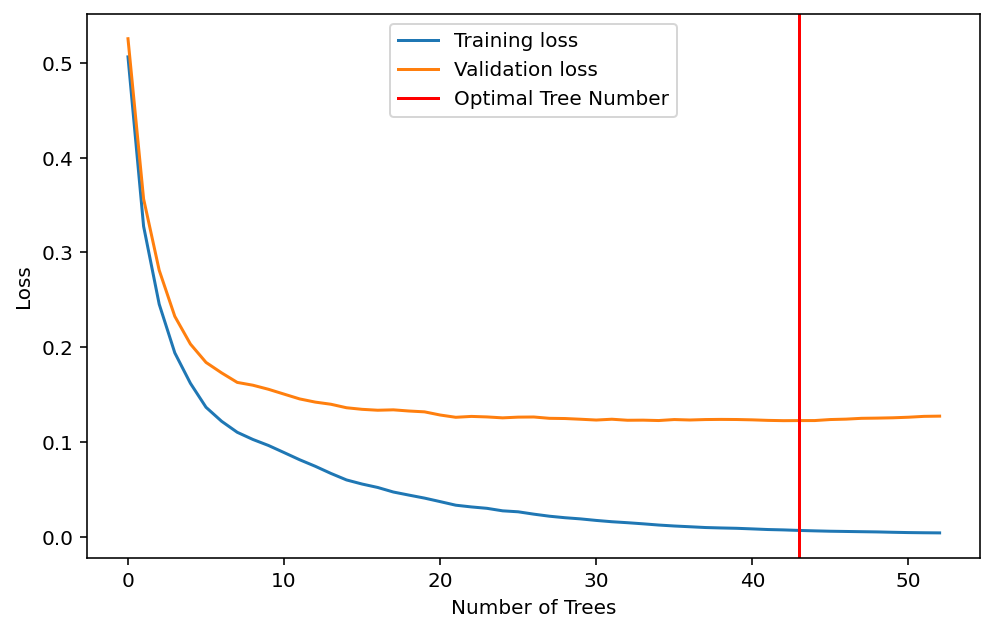

In [26]:
# 학습 결과 시각화
results = model.evals_result()
print(model.best_ntree_limit)
plt.figure(figsize=(8, 5))
plt.plot(results["validation_0"]['mlogloss'], label='Training loss')
plt.plot(results["validation_1"]['mlogloss'], label='Validation loss')
plt.axvline(model.best_ntree_limit, color='r', label='Optimal Tree Number')
plt.xlabel('Number of Trees')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# 예측하기
y_pred = model.predict(x_test)

In [28]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1928   32   16]
 [  39 1870   65]
 [  31   41 1978]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1976
           1       0.96      0.95      0.95      1974
           2       0.96      0.96      0.96      2050

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



## 3.2.objective

### 3.2.1.Multi-Class

**1) multi:softprob**

In [29]:
# multi:softprob(기본값)
model.set_params(objective='multi:softprob')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [30]:
# objective 확인
model.objective

'multi:softprob'

In [31]:
# 예측값 확인
print(y_pred[:10])
print('-' * 22)

# predict_proba 확인
proba = model.predict_proba(x_test).round(2)

print(proba[:10])
print('-' * 22)

# 최댓값의 인덱스 확인
print(proba.argmax(axis=1)[:10])

[1 2 0 2 2 2 0 0 1 0]
----------------------
[[0.   1.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.07 0.93]
 [0.   0.02 0.98]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.88 0.06 0.06]
 [0.   1.   0.  ]
 [1.   0.   0.  ]]
----------------------
[1 2 0 2 2 2 0 0 1 0]


**2) multi:softmax**

In [32]:
# multi:softmax
model.set_params(objective='multi:softmax', base_score=0)

XGBClassifier(base_score=0, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softmax', predictor='auto',
              random_state=2022, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [33]:
# objective 확인
model.objective

'multi:softmax'

In [34]:
# 예측값 확인
print(y_pred[:10])
print('-' * 22)

# predict_proba 확인
proba = model.predict_proba(x_test).round(2)

print(proba[:10])
print('-' * 22)

# 최댓값의 인덱스 확인
print(proba.argmax(axis=1)[:10])

[1 2 0 2 2 2 0 0 1 0]
----------------------
[[-4.13  3.43 -4.77]
 [-3.82 -3.22  3.53]
 [ 4.93 -3.63 -6.56]
 [-6.19  0.01  2.57]
 [-3.35 -0.9   3.18]
 [-7.46 -0.55  5.65]
 [ 7.33 -3.42 -5.64]
 [ 1.68 -1.06 -0.99]
 [-5.87  7.61 -8.97]
 [ 5.2  -3.19 -2.3 ]]
----------------------
[1 2 0 2 2 2 0 0 1 0]


## 3.2.2.Binary-Class

In [35]:
# 데이터 만들기
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000,
                           n_features=12, 
                           n_classes=2,
                           n_informative=12,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=3,)

In [36]:
# y 값 확인
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 497, 1: 503}


In [37]:
# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 선언하기
model = XGBClassifier(max_depth=5, 
                      use_label_encoder=False,
                      random_state=2022)

                      
# 학습하기
model.fit(x_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [38]:
# objective 확인
model.objective

'binary:logistic'

In [39]:
# predict_proba 확인
model.predict_proba(x_test)[:10].round(2)

array([[0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]], dtype=float32)